In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lectura del csv generado por scraping, con encabezados en la primera columna
file_path = '/content/drive/My Drive/UNI/Analitica_de_datos/Trabajos/tiempo_huancavelica_selenium.csv'
df = pd.read_csv(file_path,sep=';', header=None, index_col=0)

#Trasposicion del dataframe para trabajarlo como un dataframe normal
df = df.T  # Transponer filas y columnas

# Imprime las primeras 5 filas del DataFrame
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/UNI/Analitica_de_datos/Trabajos/tiempo_huancavelica_selenium.csv'

### Descripción de variables:

Metrica:	Hora del día en que se realizaron las mediciones climáticas (formato de 24 horas). Representa el tiempo de observación.
Temperatura:	Temperatura del aire medida en grados Celsius (°C). Refleja el calor o frío del ambiente.
Clima:	Descripción cualitativa del estado del tiempo, con respecto a la precipitación.
Precipitaciones:	Cantidad de lluvia acumulada medida en milímetros (mm) durante la hora correspondiente.
Probabilidad de nevada:	Probabilidad estimada (%) de que ocurra una nevada en esa hora.
Humedad:	Porcentaje (%) de humedad relativa en el ambiente, indicando la cantidad de vapor de agua en el aire.
Velocidad del viento:	Velocidad promedio del viento en kilómetros por hora (km/h) durante esa hora.
Ráfaga de viento:	Velocidad máxima alcanzada por el viento durante la hora medida (km/h).
Ángulo del viento:	Dirección desde la que sopla el viento expresada en grados (0° = Norte, 90° = Este, etc.).
Dirección del viento:	Dirección cardinal desde la cual proviene el viento (N, NE, E, etc.).
Nubosidad:	Porcentaje (%) del cielo cubierto por nubes.
Visibilidad:	Distancia visible medida en kilómetros (km), afectada por condiciones como niebla, lluvia o neblina.

In [51]:
#Conversión de columnas númericas a tipo de dato númerico (al leer, todas son Object)
columnas_numericas = ['Temperatura', 'Precipitaciones', 'Probabilidad de nevada', 'Humedad', 'Velocidad del viento', 'Ráfaga de viento', 'Nubosidad', 'Visibilidad', 'Ángulo del viento']

# Reemplazar comas por puntos en todas las columnas numéricas
df[columnas_numericas] = df[columnas_numericas].apply(lambda col: col.str.replace(',', '.', regex=False))

# Eliminar el símbolo de grados y convertir a numérico
df['Ángulo del viento'] = df['Ángulo del viento'].str.rstrip('°').astype(float)

#Conversión a número
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

In [52]:
#Conversión de la columna Metrica a formato Hora
df['Metrica'] = pd.to_datetime(df['Metrica'], format='%H:%M').dt.time
#Conversión a decimal en otra columna
df['Hora_decimal'] = df['Metrica'].apply(lambda x: x.hour + x.minute/60)

In [53]:
# Mostrar las columnas del dataset
print("Columnas del dataset:")
print(df.columns)

# Mostrar los valores nulos de cada columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Mostrar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df.dtypes)

Columnas del dataset:
Index(['Metrica', 'Temperatura', 'Clima', 'Precipitaciones',
       'Probabilidad de nevada', 'Humedad', 'Velocidad del viento',
       'Ráfaga de viento', 'Ángulo del viento', 'Dirección del viento',
       'Nubosidad', 'Visibilidad', 'Hora_decimal'],
      dtype='object', name=0)

Valores nulos por columna:
0
Metrica                   0
Temperatura               0
Clima                     0
Precipitaciones           0
Probabilidad de nevada    0
Humedad                   0
Velocidad del viento      0
Ráfaga de viento          0
Ángulo del viento         0
Dirección del viento      0
Nubosidad                 0
Visibilidad               0
Hora_decimal              0
dtype: int64

Tipos de datos por columna:
0
Metrica                    object
Temperatura               float64
Clima                      object
Precipitaciones           float64
Probabilidad de nevada      int64
Humedad                     int64
Velocidad del viento      float64
Ráfaga de viento   

In [54]:
# Mostrar estadísticas descriptivas para las variables numéricas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df.describe())


Estadísticas descriptivas para variables numéricas:
0      Temperatura  Precipitaciones  Probabilidad de nevada    Humedad  \
count    24.000000        24.000000                    24.0  24.000000   
mean     11.762500         0.434583                     0.0  85.000000   
std       3.906384         0.374119                     0.0  10.954451   
min       7.000000         0.050000                     0.0  65.000000   
25%       7.300000         0.125000                     0.0  76.500000   
50%      11.600000         0.385000                     0.0  92.000000   
75%      15.300000         0.575000                     0.0  93.000000   
max      17.300000         1.290000                     0.0  97.000000   

0      Velocidad del viento  Ráfaga de viento  Ángulo del viento  Nubosidad  \
count             24.000000         24.000000          24.000000  24.000000   
mean               5.225000          8.525000         108.166667  73.875000   
std                2.973397          4.8076

In [55]:
# Contar los tipos de valores diferentes en una columna
def contar_valores_unicos(df, columna):
    print(f"\nValores únicos en la columna '{columna}':")
    print(df[columna].value_counts())

contar_valores_unicos(df, 'Clima')
contar_valores_unicos(df, 'Dirección del viento')


Valores únicos en la columna 'Clima':
Clima
Lluvia moderada a intervalos                              14
Ligeras precipitaciones                                    7
Intervalos de lluvias ligeras con tomenta en la región     3
Name: count, dtype: int64

Valores únicos en la columna 'Dirección del viento':
Dirección del viento
E      5
ENE    5
NE     4
NNE    3
S      2
ESE    1
SSE    1
SSW    1
N      1
NNW    1
Name: count, dtype: int64


In [56]:
#CODIGO PARA GRAFICO DE BARRAS
def MakePlotBar(df, NombreVariable, titulo = "Poner un título", GuardarIMG=False):
  #Crear el gráfico y los ejes a manipular
  fig,ax = plt.subplots(figsize=(16,9))

  #Definir ejes
  x = df[NombreVariable].value_counts(ascending=True).index
  y = df[NombreVariable].value_counts(ascending=True)

  ax.barh(x,y,height=0.75,color="green")

  ax.set_title(titulo, fontsize=18, color="red",loc="right")

  ax.xaxis.set_tick_params(labelsize=8.5,labelcolor="black")
  ax.set_xticklabels(ax.get_xticks(),rotation=45,weight='bold',size=12)
  ax.yaxis.set_tick_params(labelsize=15,labelcolor="black")

  #Formato de miles a texto
  def MakeMiles(numero):
    if 1000<=numero<=9999:
      return str(numero)[0]+","+str(numero)[1:]
    elif 10000<=numero<=99999:
      return str(numero)[:2]+","+str(numero)[2:]
    else:
      return str(numero)

  #Asegurar que el texto no se superponga con el gráfico de barras
  for i,v in enumerate(y):
      ax.text(v+1,i,f'{MakeMiles(v)}',color="blue")

  plt.tight_layout()

  #dar amplitud al grafico
  niveles_var={}
  for nivel in df[NombreVariable].unique():
    niveles_var[nivel] = df[df[NombreVariable]==nivel].shape[0]

  #convertir el diccionario en serie
  niveles_var_df = pd.Series(niveles_var)

  #agregar el maximo nivel de barra a cada limite
  LimiteX = niveles_var_df.sort_values(ascending=False)[0]
  plt.xlim(0,1.1*LimiteX)

  #guardar imagen
  if GuardarIMG==True:
    tituloIMG=titulo+ ".jpeg"
    plt.savefig(tituloIMG,dpi=300)

  #graficar
  plt.show()

<ipython-input-56-88760baeab5c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(),rotation=45,weight='bold',size=12)
<ipython-input-56-88760baeab5c>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  LimiteX = niveles_var_df.sort_values(ascending=False)[0]


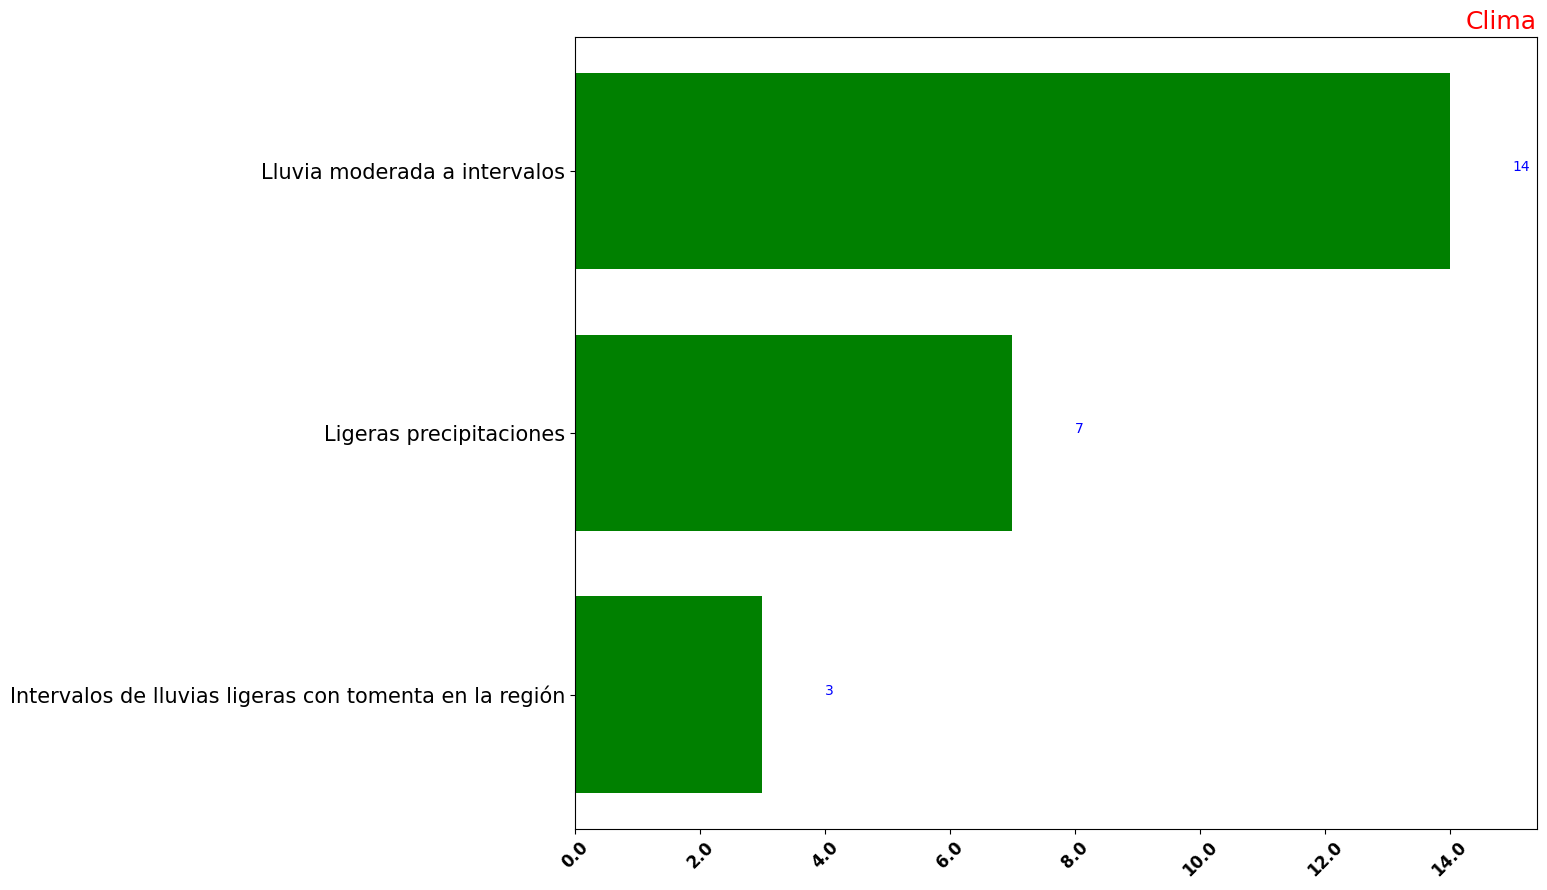

In [ ]:
#Grafico de barras para la columna 'Clima'
MakePlotBar(df,'Clima','Clima', True)
MakePlotBar(df,'Dirección del viento','Dirección del viento', True)

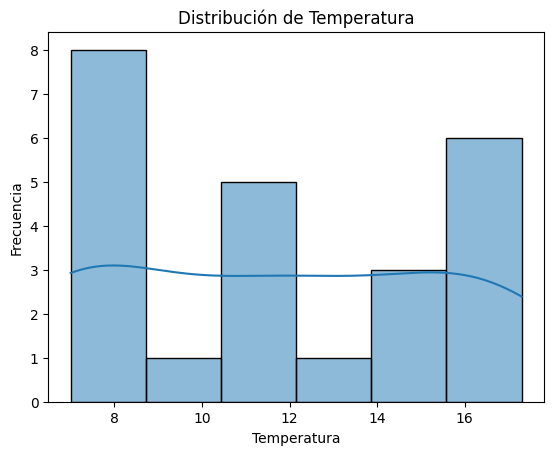

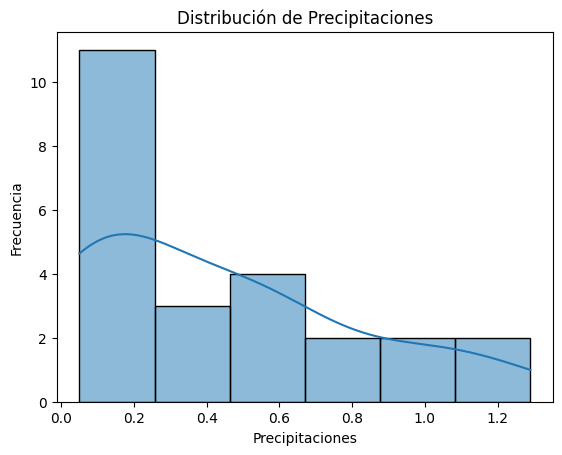

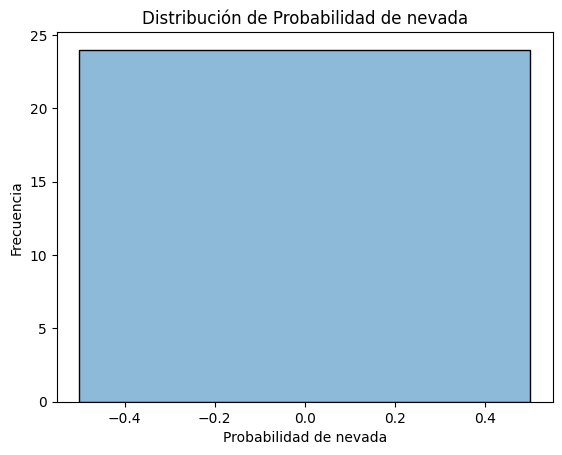

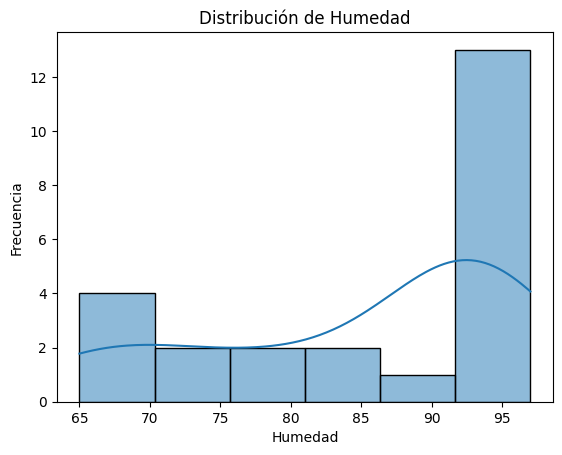

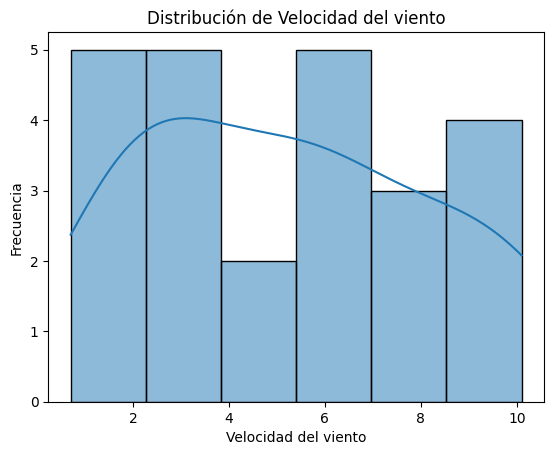

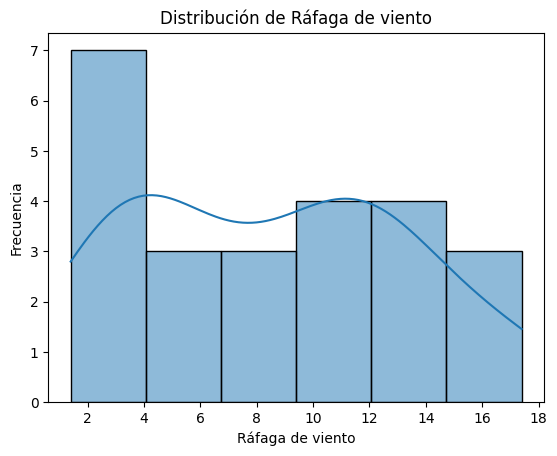

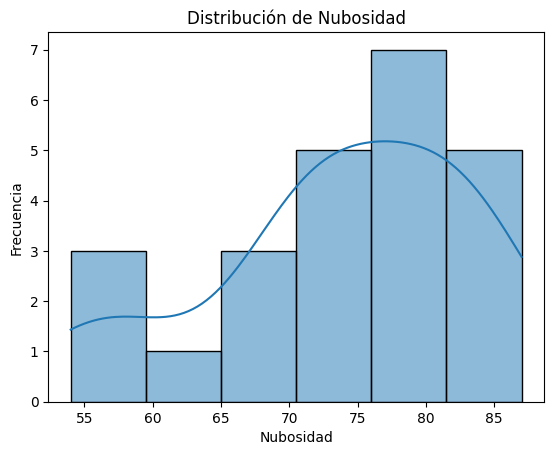

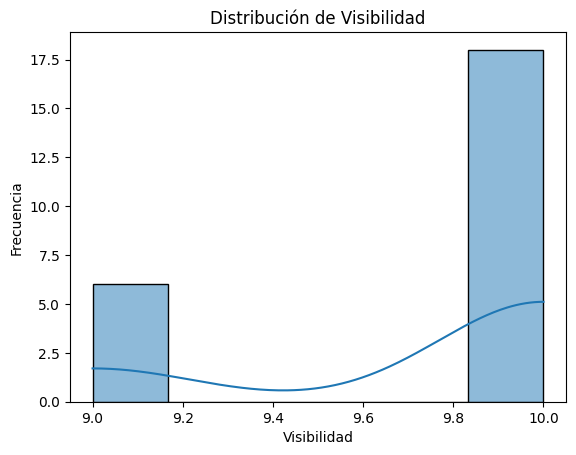

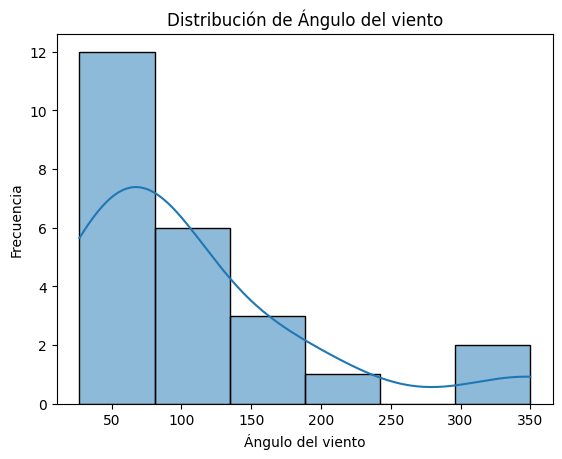

In [58]:
#histogramas de variables numéricas
for col in columnas_numericas:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

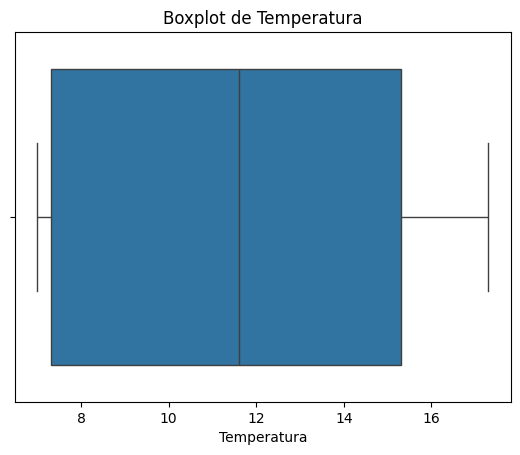

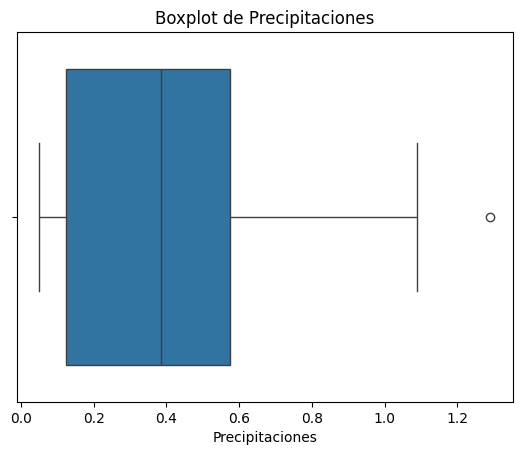

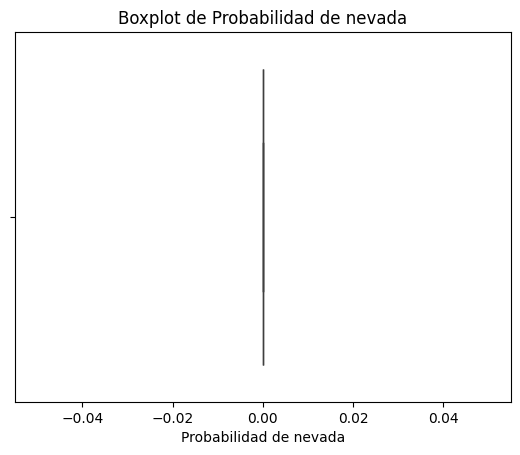

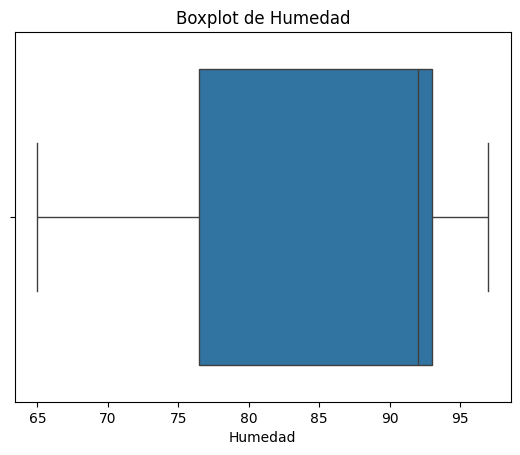

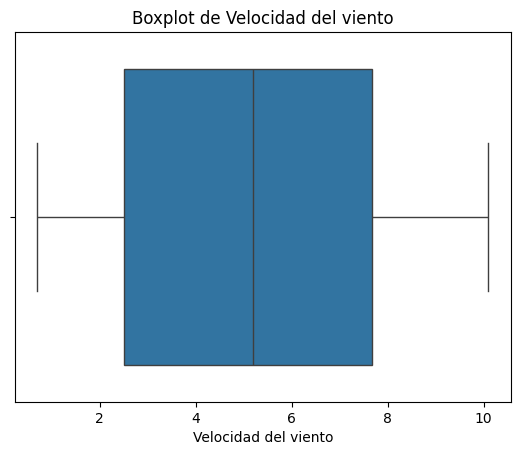

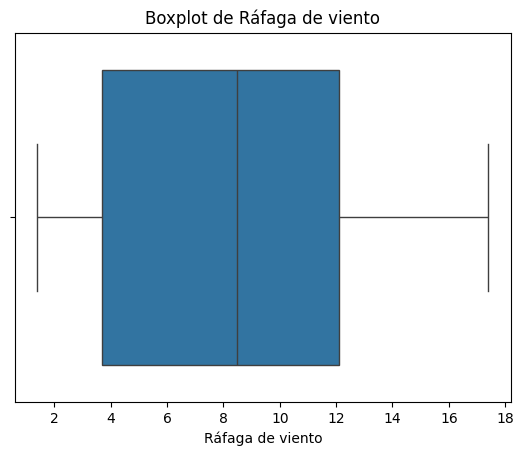

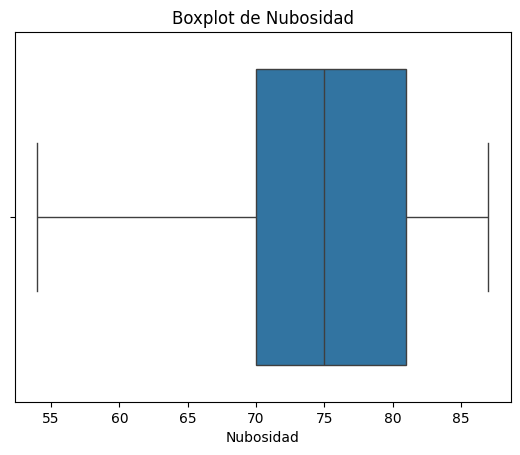

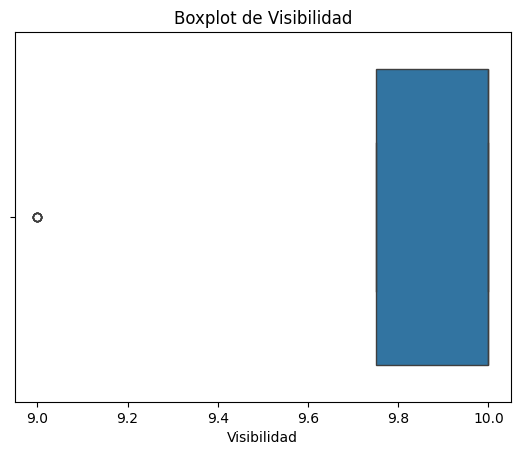

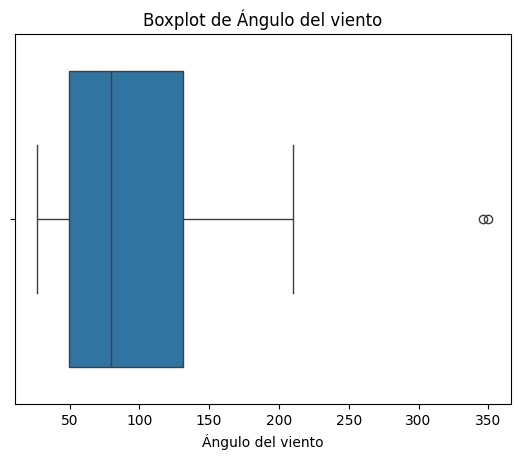

In [59]:
#Detección de outliers en variables numéricas con boxplots
for col in columnas_numericas:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

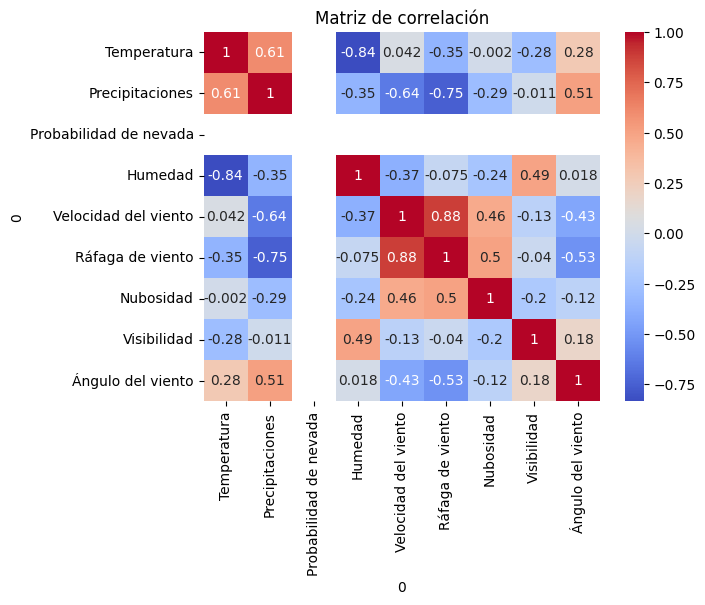

In [60]:
#Análisis de correlación con mapa de calor
corr = df[columnas_numericas].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### Movimiento de variables en el día

In [61]:
def MakePlotTime(df, NombreVariable):
  plt.plot(df['Hora_decimal'], df[NombreVariable], marker='o')
  plt.xticks(rotation=45)
  plt.title(NombreVariable + " a lo largo del día")
  plt.xlabel("Hora")
  plt.ylabel(NombreVariable)
  plt.grid(True)
  plt.show()

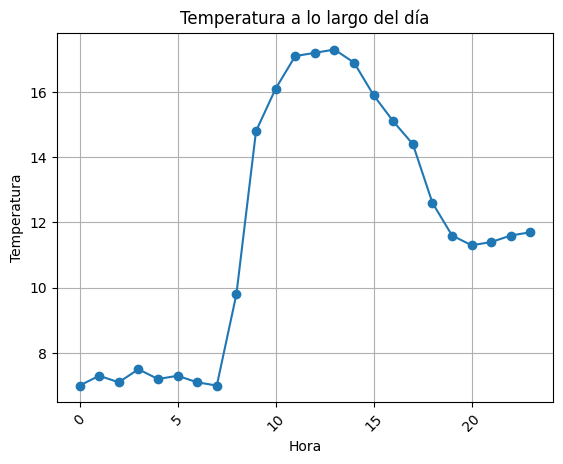

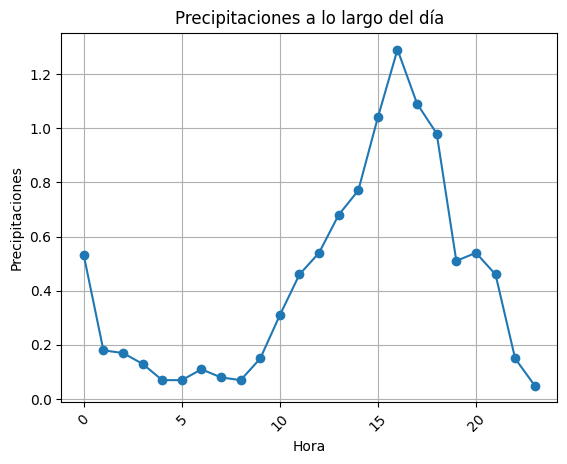

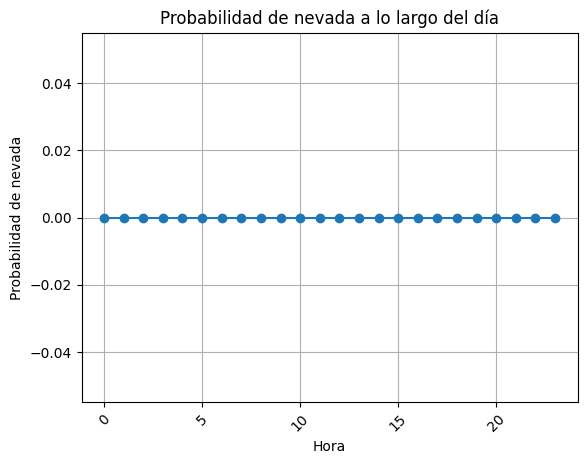

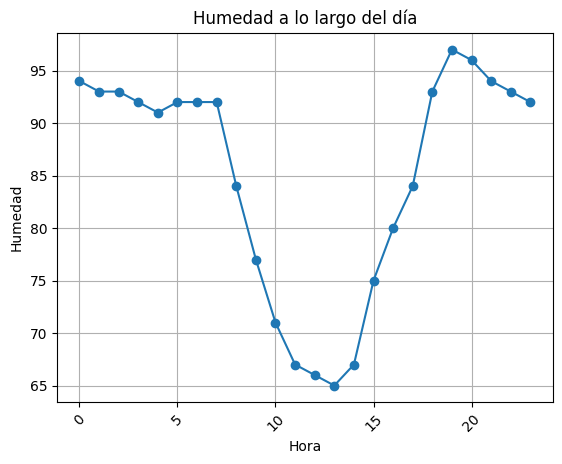

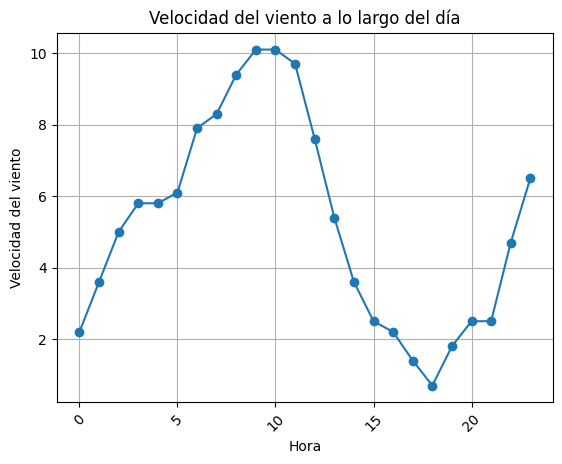

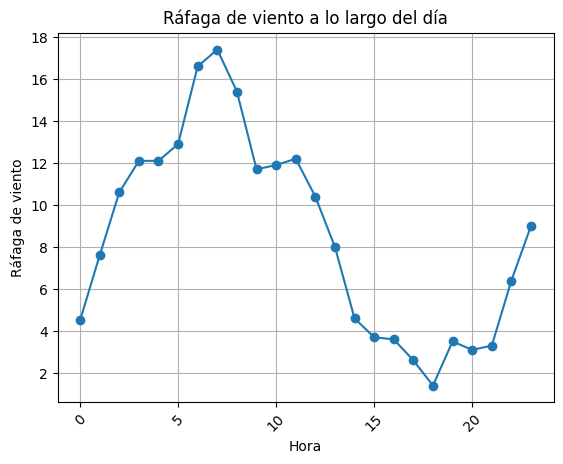

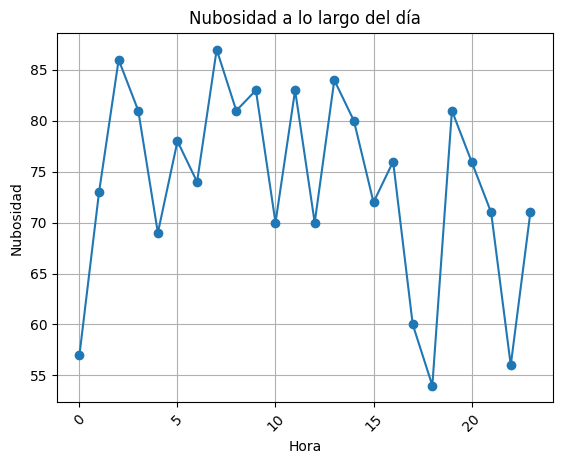

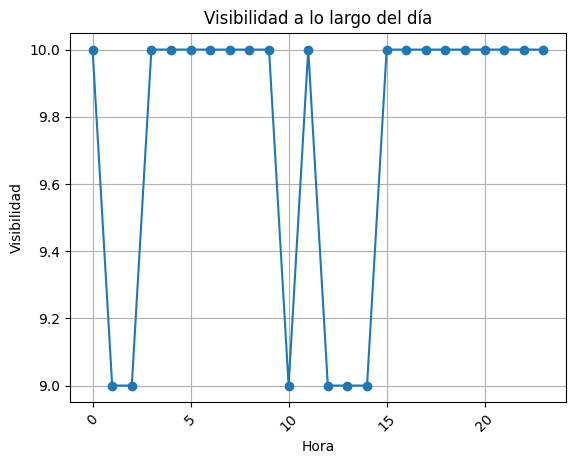

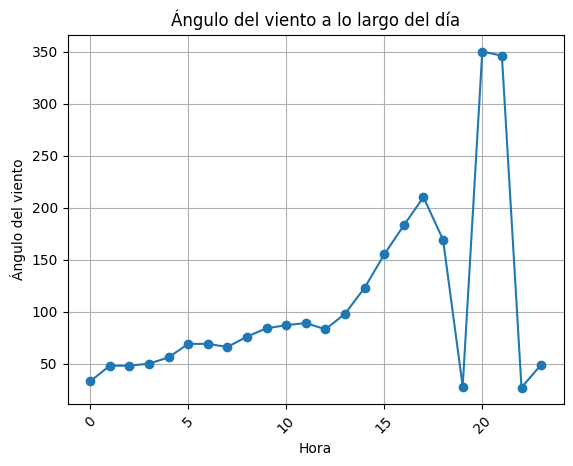

In [62]:
MakePlotTime(df, 'Temperatura')
MakePlotTime(df, 'Precipitaciones')
MakePlotTime(df, 'Probabilidad de nevada')
MakePlotTime(df, 'Humedad')
MakePlotTime(df, 'Velocidad del viento')
MakePlotTime(df, 'Ráfaga de viento')
MakePlotTime(df, 'Nubosidad')
MakePlotTime(df, 'Visibilidad')
MakePlotTime(df, 'Ángulo del viento')

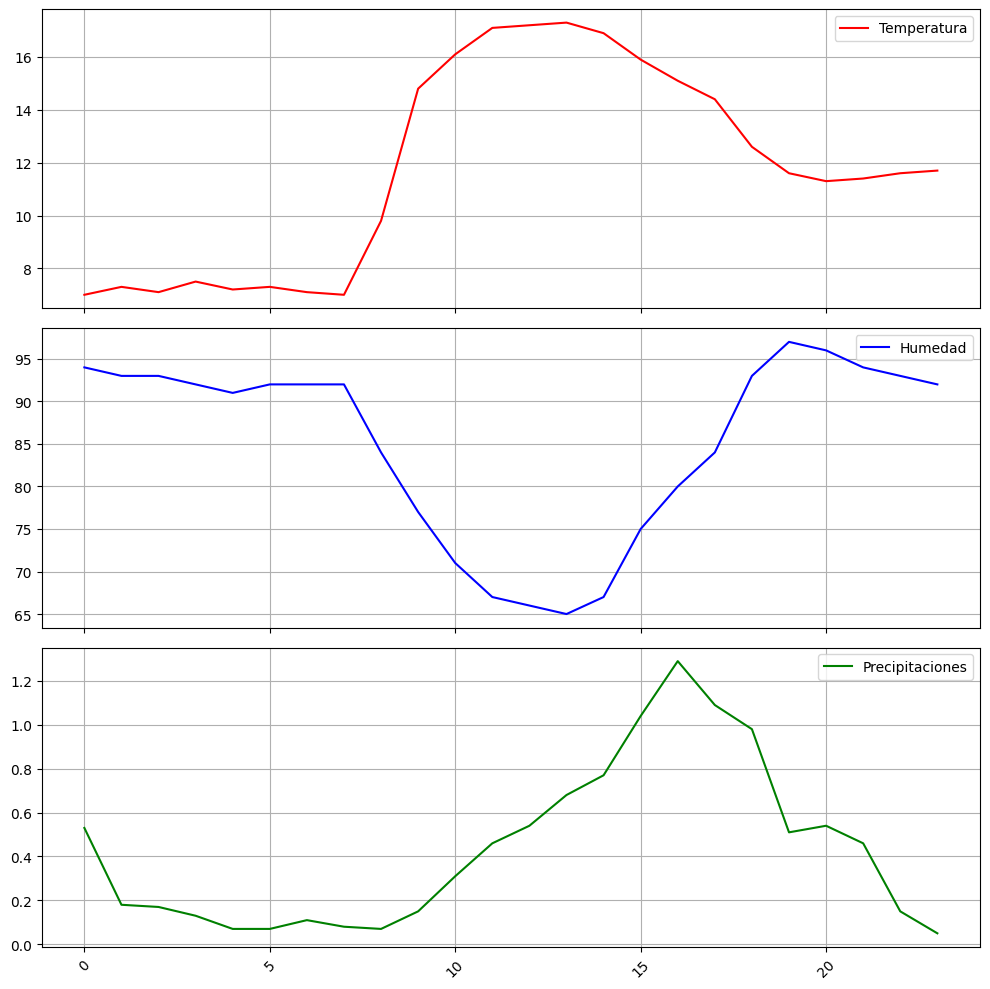

In [63]:
#Comparación múltiple
fig, ax = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

ax[0].plot(df['Hora_decimal'], df['Temperatura'], label='Temperatura', color='red')
ax[1].plot(df['Hora_decimal'], df['Humedad'], label='Humedad', color='blue')
ax[2].plot(df['Hora_decimal'], df['Precipitaciones'], label='Precipitaciones', color='green')

for a in ax:
    a.legend()
    a.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


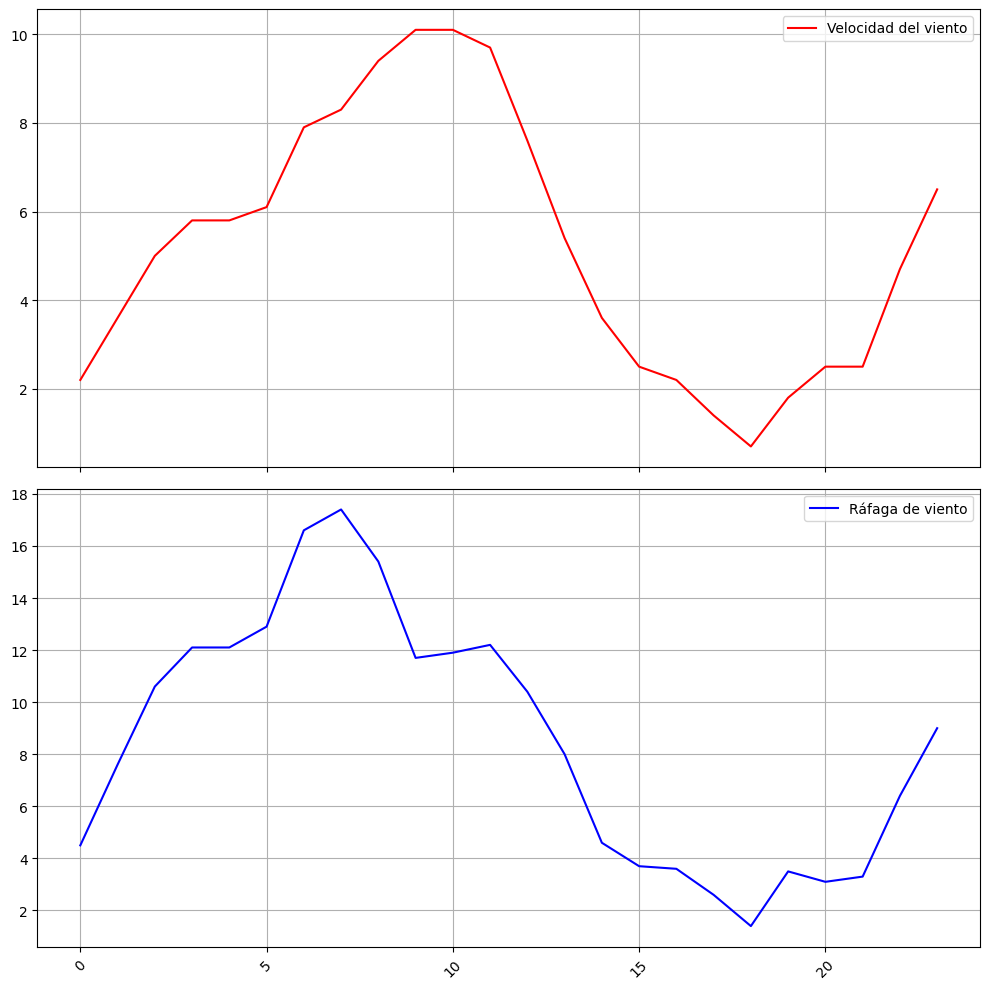

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax[0].plot(df['Hora_decimal'], df['Velocidad del viento'], label='Velocidad del viento', color='red')
ax[1].plot(df['Hora_decimal'], df['Ráfaga de viento'], label='Ráfaga de viento', color='blue')

for a in ax:
    a.legend()
    a.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Verificación de posibles outliers

In [65]:
df['Visibilidad']

,Visibilidad
1,10
2,9
3,9
4,10
5,10
6,10
7,10
8,10
9,10
10,10


In [66]:
df['Precipitaciones']

,Precipitaciones
1,0.53
2,0.18
3,0.17
4,0.13
5,0.07
6,0.07
7,0.11
8,0.08
9,0.07
10,0.15


In [67]:
df['Clima']

,Clima
1,Ligeras precipitaciones
2,Lluvia moderada a intervalos
3,Lluvia moderada a intervalos
4,Lluvia moderada a intervalos
5,Lluvia moderada a intervalos
6,Lluvia moderada a intervalos
7,Lluvia moderada a intervalos
8,Lluvia moderada a intervalos
9,Lluvia moderada a intervalos
10,Lluvia moderada a intervalos


In [68]:
df['Ángulo del viento']

,Ángulo del viento
1,33.0
2,48.0
3,48.0
4,50.0
5,56.0
6,69.0
7,69.0
8,66.0
9,76.0
10,84.0


Observamos que para visibilidad hay baja variabilidad, por lo que no realizamos tratamiento.
Para la columna Precipitaciones, el valor 1.29 coincide con una lluvia ligera con tormenta, la cual ya presenta valores altos, por lo que de igual forma, no realizamos tratamiento.
Por último, para la columna Ángulo del viento, consideramos que es una variable cuasi numérica, por lo que tampoco es conveniente realizar tratamiento